
<div style="text-align:center">
    <img src="https://lecercledesredacteurs.com/wp-content/uploads/2016/10/274182774_3a95e990c3_o-768x548-1-1.jpg.webp" alt="Angry Penguins" />
    <H1><strong>Hello there !!</strong></H1>
</div>


### **Chargement des données et des bibliothèques nécessaires**


In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("csv/penguins.xls")
data


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### **Analyse des valeurs manquantes**

In [216]:
print(data.isnull().sum())
data

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### **Suppression des valeurs manquantes**


In [217]:
data = data.dropna()
data

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### **Suppression des doublons**

In [218]:
data = data.drop_duplicates()
data

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### **Encodage de la variable 'sex' dans le jeu de données**


In [219]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,1,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,0,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,1,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,1,2009


### **Création de variables indicatrices pour la variable 'island'**

In [220]:

data = pd.get_dummies(data, columns=['island'])
data


,Unnamed: 0,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,1,Adelie,39.1,18.7,181.0,3750.0,1,2007,False,False,True
1,2,Adelie,39.5,17.4,186.0,3800.0,0,2007,False,False,True
2,3,Adelie,40.3,18.0,195.0,3250.0,0,2007,False,False,True
4,5,Adelie,36.7,19.3,193.0,3450.0,0,2007,False,False,True
5,6,Adelie,39.3,20.6,190.0,3650.0,1,2007,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,55.8,19.8,207.0,4000.0,1,2009,False,True,False
340,341,Chinstrap,43.5,18.1,202.0,3400.0,0,2009,False,True,False
341,342,Chinstrap,49.6,18.2,193.0,3775.0,1,2009,False,True,False
342,343,Chinstrap,50.8,19.0,210.0,4100.0,1,2009,False,True,False


### **Création de variables indicatrices pour la variable 'species'**

In [221]:
data = pd.get_dummies(data, columns=['species'])
data


,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,1,39.1,18.7,181.0,3750.0,1,2007,False,False,True,True,False,False
1,2,39.5,17.4,186.0,3800.0,0,2007,False,False,True,True,False,False
2,3,40.3,18.0,195.0,3250.0,0,2007,False,False,True,True,False,False
4,5,36.7,19.3,193.0,3450.0,0,2007,False,False,True,True,False,False
5,6,39.3,20.6,190.0,3650.0,1,2007,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,340,55.8,19.8,207.0,4000.0,1,2009,False,True,False,False,True,False
340,341,43.5,18.1,202.0,3400.0,0,2009,False,True,False,False,True,False
341,342,49.6,18.2,193.0,3775.0,1,2009,False,True,False,False,True,False
342,343,50.8,19.0,210.0,4100.0,1,2009,False,True,False,False,True,False


### **Mise à l'échelle des caractéristiques numériques**

In [222]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

# Création d'une copie des données pour ne pas modifier les originales
X_scaled = data.copy()

scaler = StandardScaler()

X_scaled[numerical_columns] = scaler.fit_transform(X_scaled[numerical_columns])

### **Création des ensembles de caractéristiques (X) et de la variable cible (y)**

In [223]:


X = data[['Unnamed: 0', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year', 'island_Biscoe', 'island_Dream', 'island_Torgersen']]

y = data[['species_Adelie', 'species_Chinstrap', 'species_Gentoo']] 
y = y.idxmax(axis=1)  # Prenez l'espèce avec la valeur la plus élevée comme variable cible



<div style="text-align:center">
    <img src="https://ih1.redbubble.net/image.1882424075.5334/st,medium,507x507-pad,600x600,f8f8f8.jpg" alt="Entrainement Penguins" />
</div>

### **Division des données en ensembles d'entraînement et de test**

In [224]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Entraînement et évaluation du modèle de Régression Logistique**

In [225]:
from sklearn.linear_model import LogisticRegression

model_logistic_regression = LogisticRegression(max_iter=1000)  # Augmente le nombre maximum d'itérations
model_logistic_regression.fit(X_train, y_train)
y_pred_logistic_regression = model_logistic_regression.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Accuracy Logistic Regression:", accuracy_logistic_regression)



Accuracy Logistic Regression: 1.0


### **Sélection des meilleures caractéristiques avec SelectKBest et ANOVA F-value**

In [227]:
from sklearn.feature_selection import SelectKBest, f_classif

# Définir le nombre de caractéristiques à sélectionner
k = 5  # par exemple

# Appliquer SelectKBest avec le test ANOVA F-value pour la classification
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)  # X est ton jeu de données, y est ta cible

selected_columns = X.columns[selector.get_support()]
print("Colonnes sélectionnées:", selected_columns)


Colonnes sélectionnées: Index(['Unnamed: 0', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')


### **Entraînement du modèle Random Forest Classifier et Importance des caractéristiques**

In [228]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)  # Entraînement du modèle

# Afficher l'importance des caractéristiques
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print("Importance des caractéristiques:", feature_importances_sorted)


Importance des caractéristiques: Unnamed: 0           0.360941
bill_length_mm       0.177868
flipper_length_mm    0.159699
bill_depth_mm        0.098267
island_Dream         0.078678
island_Biscoe        0.065346
body_mass_g          0.049101
island_Torgersen     0.008115
sex                  0.001188
year                 0.000798
dtype: float64


### **Optimisation des hyperparamètres pour Logistic Regression avec GridSearchCV**

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs']
}

model_lr = LogisticRegression(max_iter=1000)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search_lr = GridSearchCV(model_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X, y)

print("Meilleurs hyperparamètres pour LogisticRegression:", grid_search_lr.best_params_)
print("Meilleure précision pour LogisticRegression:", grid_search_lr.best_score_)



Meilleurs hyperparamètres pour LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Meilleure précision pour LogisticRegression: 1.0


### **Validation croisée pour évaluer le modèle Logistic Regression**

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)  # Tu peux ajuster les hyperparamètres si nécessaire

# Effectuer une validation croisée avec 5 partitions pour évaluer le modèle
cv_scores_lr = cross_val_score(model_lr, X, y, cv=5, scoring='accuracy')

print("Scores de validation croisée pour LogisticRegression:", cv_scores_lr)

print("Moyenne des scores de validation croisée pour LogisticRegression:", cv_scores_lr.mean())


Scores de validation croisée pour LogisticRegression: [1.         1.         0.98507463 1.         0.96969697]
Moyenne des scores de validation croisée pour LogisticRegression: 0.9909543193125282


### **Prédictions et Analyse des erreurs du modèle Logistic Regression**

In [231]:
# Utilisation du modèle LogisticRegression (ou modèle choisi) sur l'ensemble de test
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)  # Utilise le meilleur modèle trouvé précédemment

# Comparaison entre les prédictions et les vraies étiquettes pour l'analyse des erreurs
incorrect_predictions_lr = X_test[y_pred_lr != y_test]


### **Coefficients des Caractéristiques pour Logistic Regression**

In [232]:
# Afficher les coefficients des caractéristiques pour LogisticRegression
coefficients = pd.Series(grid_search_lr.best_estimator_.coef_[0], index=X.columns)
coefficients_sorted = coefficients.abs().sort_values(ascending=False)
print("Coefficients des caractéristiques pour LogisticRegression:", coefficients_sorted)


Coefficients des caractéristiques pour LogisticRegression: Unnamed: 0           0.249205
flipper_length_mm    0.109604
year                 0.056140
bill_length_mm       0.043418
bill_depth_mm        0.038216
body_mass_g          0.011977
sex                  0.007869
island_Biscoe        0.006867
island_Dream         0.006471
island_Torgersen     0.000416
dtype: float64


### **Visualisation des données pour l'analyse des erreurs de prédiction**

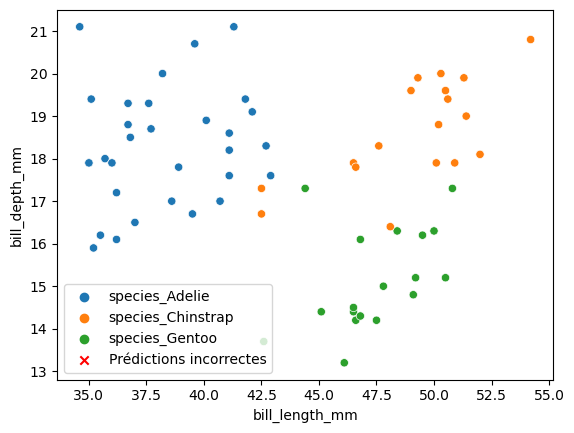

In [233]:
# Remplace 'bill_length_mm' et 'bill_depth_mm' par les caractéristiques que tu veux visualiser
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue=y_test, data=X_test)
plt.scatter(incorrect_predictions_lr['bill_length_mm'], incorrect_predictions_lr['bill_depth_mm'], color='red', marker='x', label='Prédictions incorrectes')
plt.legend()
plt.show()



<div style="text-align:center">
    <img src="https://ih1.redbubble.net/image.4796166963.3142/flat,750x,075,f-pad,750x1000,f8f8f8.u1.jpg" alt="Entrainement Penguins" width= 25%/>
</div>